In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/projectai/project_data

/content/drive/MyDrive/projectai/project_data


In [ ]:
import os

# Function to count files in a given directory (and subdirectories if needed)
def count_files(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

# Define paths to train, test, and validation directories (from the YAML file)
train_dir = '/content/drive/MyDrive/projectai/project_data/train/images'
val_dir = '/content/drive/MyDrive/projectai/project_data/valid/images'
test_dir = '/content/drive/MyDrive/projectai/project_data/test/images'

# Count the number of files in each directory
train_count = count_files(train_dir)
val_count = count_files(val_dir)
test_count = count_files(test_dir)

print(f"Number of files in Train set: {train_count}")
print(f"Number of files in Validation set: {val_count}")
print(f"Number of files in Test set: {test_count}")


Number of files in Train set: 645
Number of files in Validation set: 61
Number of files in Test set: 31


In [ ]:
import os
import shutil
import random

# Define paths
train_images_path = '/content/drive/MyDrive/projectai/project_data/train/images'
train_labels_path = '/content/drive/MyDrive/projectai/project_data/train/labels/'
test_images_path = '/content/drive/MyDrive/projectai/project_data/test/images/'
test_labels_path = '/content/drive/MyDrive/projectai/test/labels/'

# Create the test directories if they don't exist
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)

# Get list of all training images
train_images = [img for img in os.listdir(train_images_path) if img.endswith('.jpg')]  # Adjust the extension as needed

# Randomly select 30 images
selected_images = random.sample(train_images, 30)

# Move images and corresponding labels to the test set
for img in selected_images:
    # Construct full file paths
    img_src = os.path.join(train_images_path, img)
    label_src = os.path.join(train_labels_path, img.replace('.jpg', '.txt'))  # Assuming labels are in .txt format

    # Move image
    shutil.move(img_src, os.path.join(test_images_path, img))

    # Move corresponding label if it exists
    if os.path.exists(label_src):
        shutil.move(label_src, os.path.join(test_labels_path, img.replace('.jpg', '.txt')))

print(f"Moved {len(selected_images)} images and their labels to the test set.")


Moved 30 images and their labels to the test set.


Number of files in all set: 737
Number of files in Train set: 615
Number of files in Validation set: 61
Number of files in Test set: 61


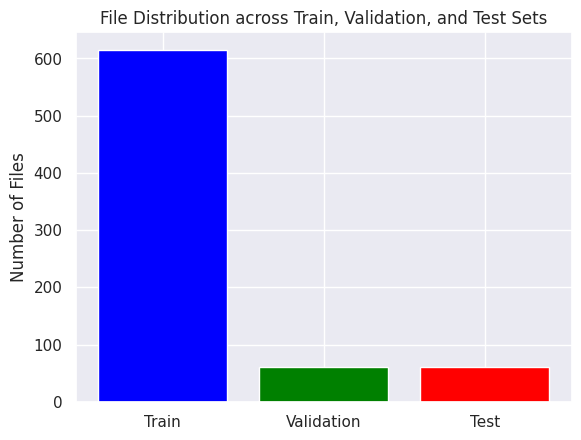

In [ ]:
import os
import matplotlib.pyplot as plt


# Function to count files in a given directory (and subdirectories if needed)
def count_files(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

# Define paths to train, test, and validation directories (from the YAML file)
train_dir = '/content/drive/MyDrive/projectai/project_data/train/images'
val_dir = '/content/drive/MyDrive/projectai/project_data/valid/images'
test_dir = '/content/drive/MyDrive/projectai/project_data/test/images'

# Count the number of files in each directory
train_count = count_files(train_dir)
val_count = count_files(val_dir)
test_count = count_files(test_dir)

print(f"Number of files in all set: {test_count+train_count+val_count}")
print(f"Number of files in Train set: {train_count}")
print(f"Number of files in Validation set: {val_count}")
print(f"Number of files in Test set: {test_count}")

data = {'Train': train_count, 'Validation': val_count, 'Test': test_count}

# Create bar chart
plt.bar(data.keys(), data.values(), color=['blue', 'green', 'red'])
plt.title('File Distribution across Train, Validation, and Test Sets')
plt.ylabel('Number of Files')
plt.show()


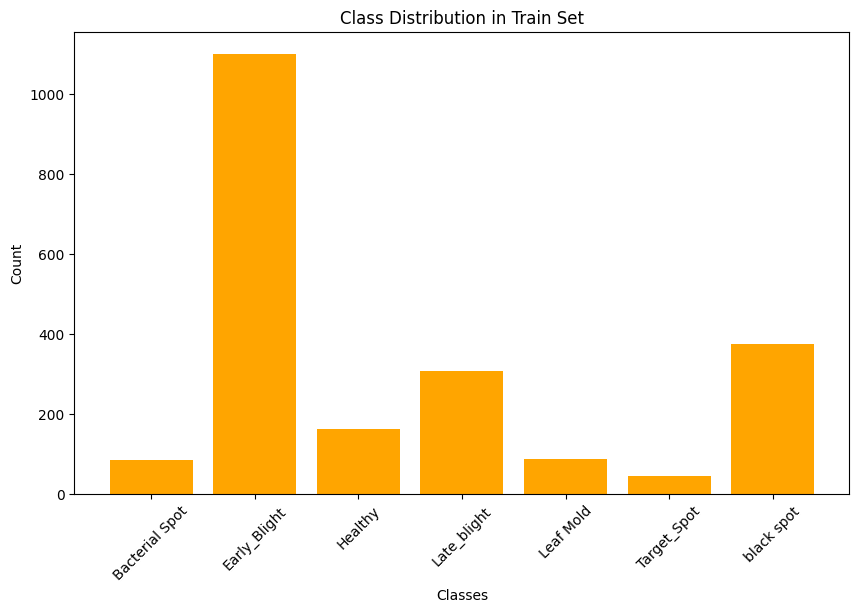

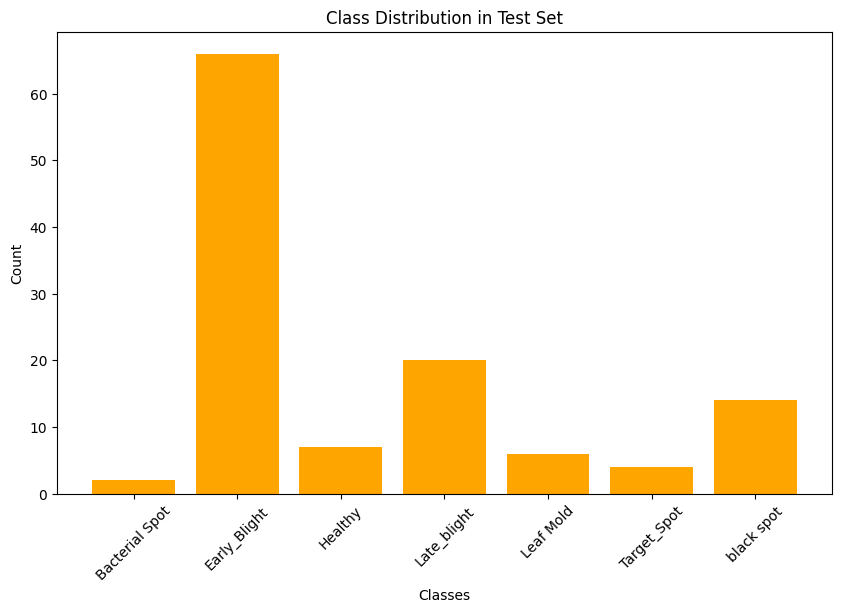

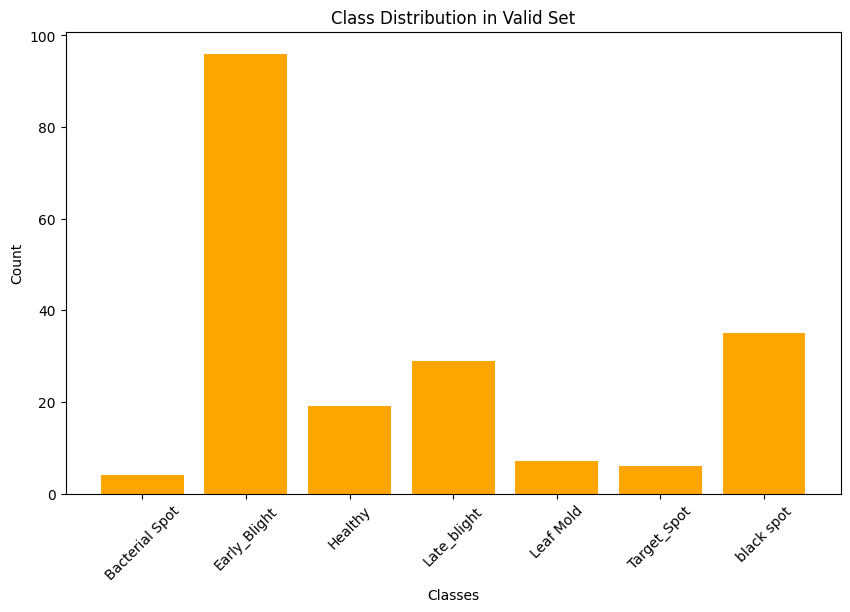

In [ ]:
import os
import yaml
import matplotlib.pyplot as plt
from collections import Counter

dataset_path = '/content/drive/MyDrive/projectai/project_data'

# Load the YAML file to get class names
yaml_file = '/content/drive/MyDrive/projectai/project_data/data.yaml'
with open(yaml_file, 'r') as f:
    data = yaml.safe_load(f)

# Extract class names and paths
class_names = data['names']
paths = {
    'train': data['train'].replace('..', dataset_path),
    'test': data['test'].replace('..', dataset_path),
    'valid': data['val'].replace('..', dataset_path)
}

# Custom colors for each class
class_colors = {
    'Bacterial Spot': 'red',
    'Early_Blight': 'green',
    'Healthy': 'blue',
    'Late_blight': 'purple',
    'Leaf Mold': 'orange',
    'Target_Spot': 'pink',
    'black spot': 'brown'
}

# Function to count class occurrences
def count_classes(labels_folder):
    class_counter = Counter()
    for label_file in os.listdir(labels_folder):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_folder, label_file), 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])  # Class ID is the first number
                    class_counter[class_id] += 1
    return class_counter

# Initialize a Counter to hold counts for train, test, and valid sets
class_counts = {'train': Counter(), 'test': Counter(), 'valid': Counter()}

# Define paths for train, test, and valid labels
for dataset_type in ['train', 'test', 'valid']:
    labels_folder = os.path.join(paths[dataset_type].replace('/images', '/labels'))
    class_counts[dataset_type] = count_classes(labels_folder)

# Plot the class distribution with custom colors
def plot_class_distribution(class_counts, dataset_type):
    classes = [class_names[i] for i in range(len(class_names))]
    counts = [class_counts[dataset_type][i] for i in range(len(class_names))]
   # colors = [class_colors[class_names[i]] for i in range(len(class_names))]

    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='orange')
    plt.title(f'Class Distribution in {dataset_type.capitalize()} Set')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plot for each dataset type
for dataset_type in ['train', 'test', 'valid']:
    plot_class_distribution(class_counts, dataset_type)


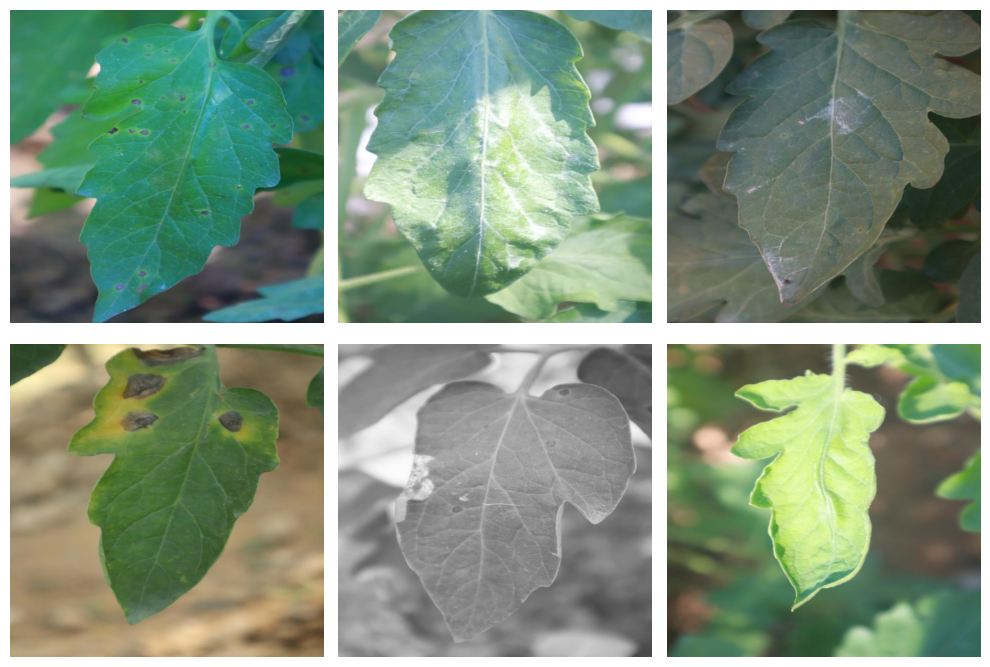

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

train_dir='/content/drive/MyDrive/projectai/project_data/train/images/'
# Load a few random images from train folder
train_images = glob(os.path.join(train_dir, '*.jpg'))  # Assuming .jpg format

fig, axs = plt.subplots(2, 3, figsize=(10, 7))
axs = axs.flatten()

for img_path, ax in zip(random.sample(train_images, 6), axs):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!ls /content/drive/MyDrive/projectai/project_data/test/images

IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg
IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg
IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg
IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg
IMG_0281_JPG.rf.a29c913abceeed1ea6092ab0f2c92b0d.jpg
IMG_0288_JPG.rf.ca824ec09b29571c39dc6b6ee6b0f6a7.jpg
IMG_0299_JPG.rf.d19f0cf7d3997c407f195ae8c59cd046.jpg
IMG_0300_JPG.rf.9294551b97cedde7e681b52876aed944.jpg
IMG_0306_JPG.rf.8cfc41c387ad5f06390912b8adf4f001.jpg
IMG_0337_JPG.rf.c5ee563d8584973ee9fd339de59c0c8f.jpg
IMG_0345_JPG.rf.6d1707b20ec861a78ba83945801a0898.jpg
IMG_0349_JPG.rf.986b62f1b9daaaea2228dff4cf072182.jpg
IMG_0359_JPG.rf.e4fb9464647fd62372ad23e4e93acf58.jpg
IMG_0361_JPG.rf.9df45f9f1d831bf0c30f3d62a2cd8b7a.jpg
IMG_0363_JPG.rf.b70df68ea826d4a56ea04fc61cc14f60.jpg
IMG_0371_JPG.rf.eceaf990bab5276fbb1499eb0321f412.jpg
IMG_0554_JPG.rf.123e05abb041babb491a02b436260cff.jpg
IMG_0577_JPG.rf.8f4955468e2ee47f88e50443943f45df.jpg
IMG_0580_JPG.rf.1366720960579853ffc3981a6deaa5

In [ ]:
%cd /content/drive/MyDrive/projectai/project_data

!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=70 imgsz=640 plots=True

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(self.amp):
      20/70      3.49G      1.102     0.7911      1.032         86        512:  32% 13/41 [00:12<00:30,  1.10s/it]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      20/70      3.49G      1.082     0.7912      1.032         41        512:  34% 14/41 [00:12<00:23,  1.14it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
      20/70      3.49G      1.092     0.7937      1.031         83        512:  37% 15/41 [00:14<00:28,  1.11s/it]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:

In [ ]:
!ls runs/detect/train


args.yaml					    results.csv		 train_batch2.jpg
confusion_matrix.png				    results.png		 val_batch0_labels.jpg
events.out.tfevents.1726414208.c4f1fd3ef7a7.2628.0  train_batch0.jpg	 val_batch0_pred.jpg
F1_curve.png					    train_batch1640.jpg  val_batch1_labels.jpg
P_curve.png					    train_batch1641.jpg  val_batch1_pred.jpg
PR_curve.png					    train_batch1642.jpg  weights
R_curve.png					    train_batch1.jpg


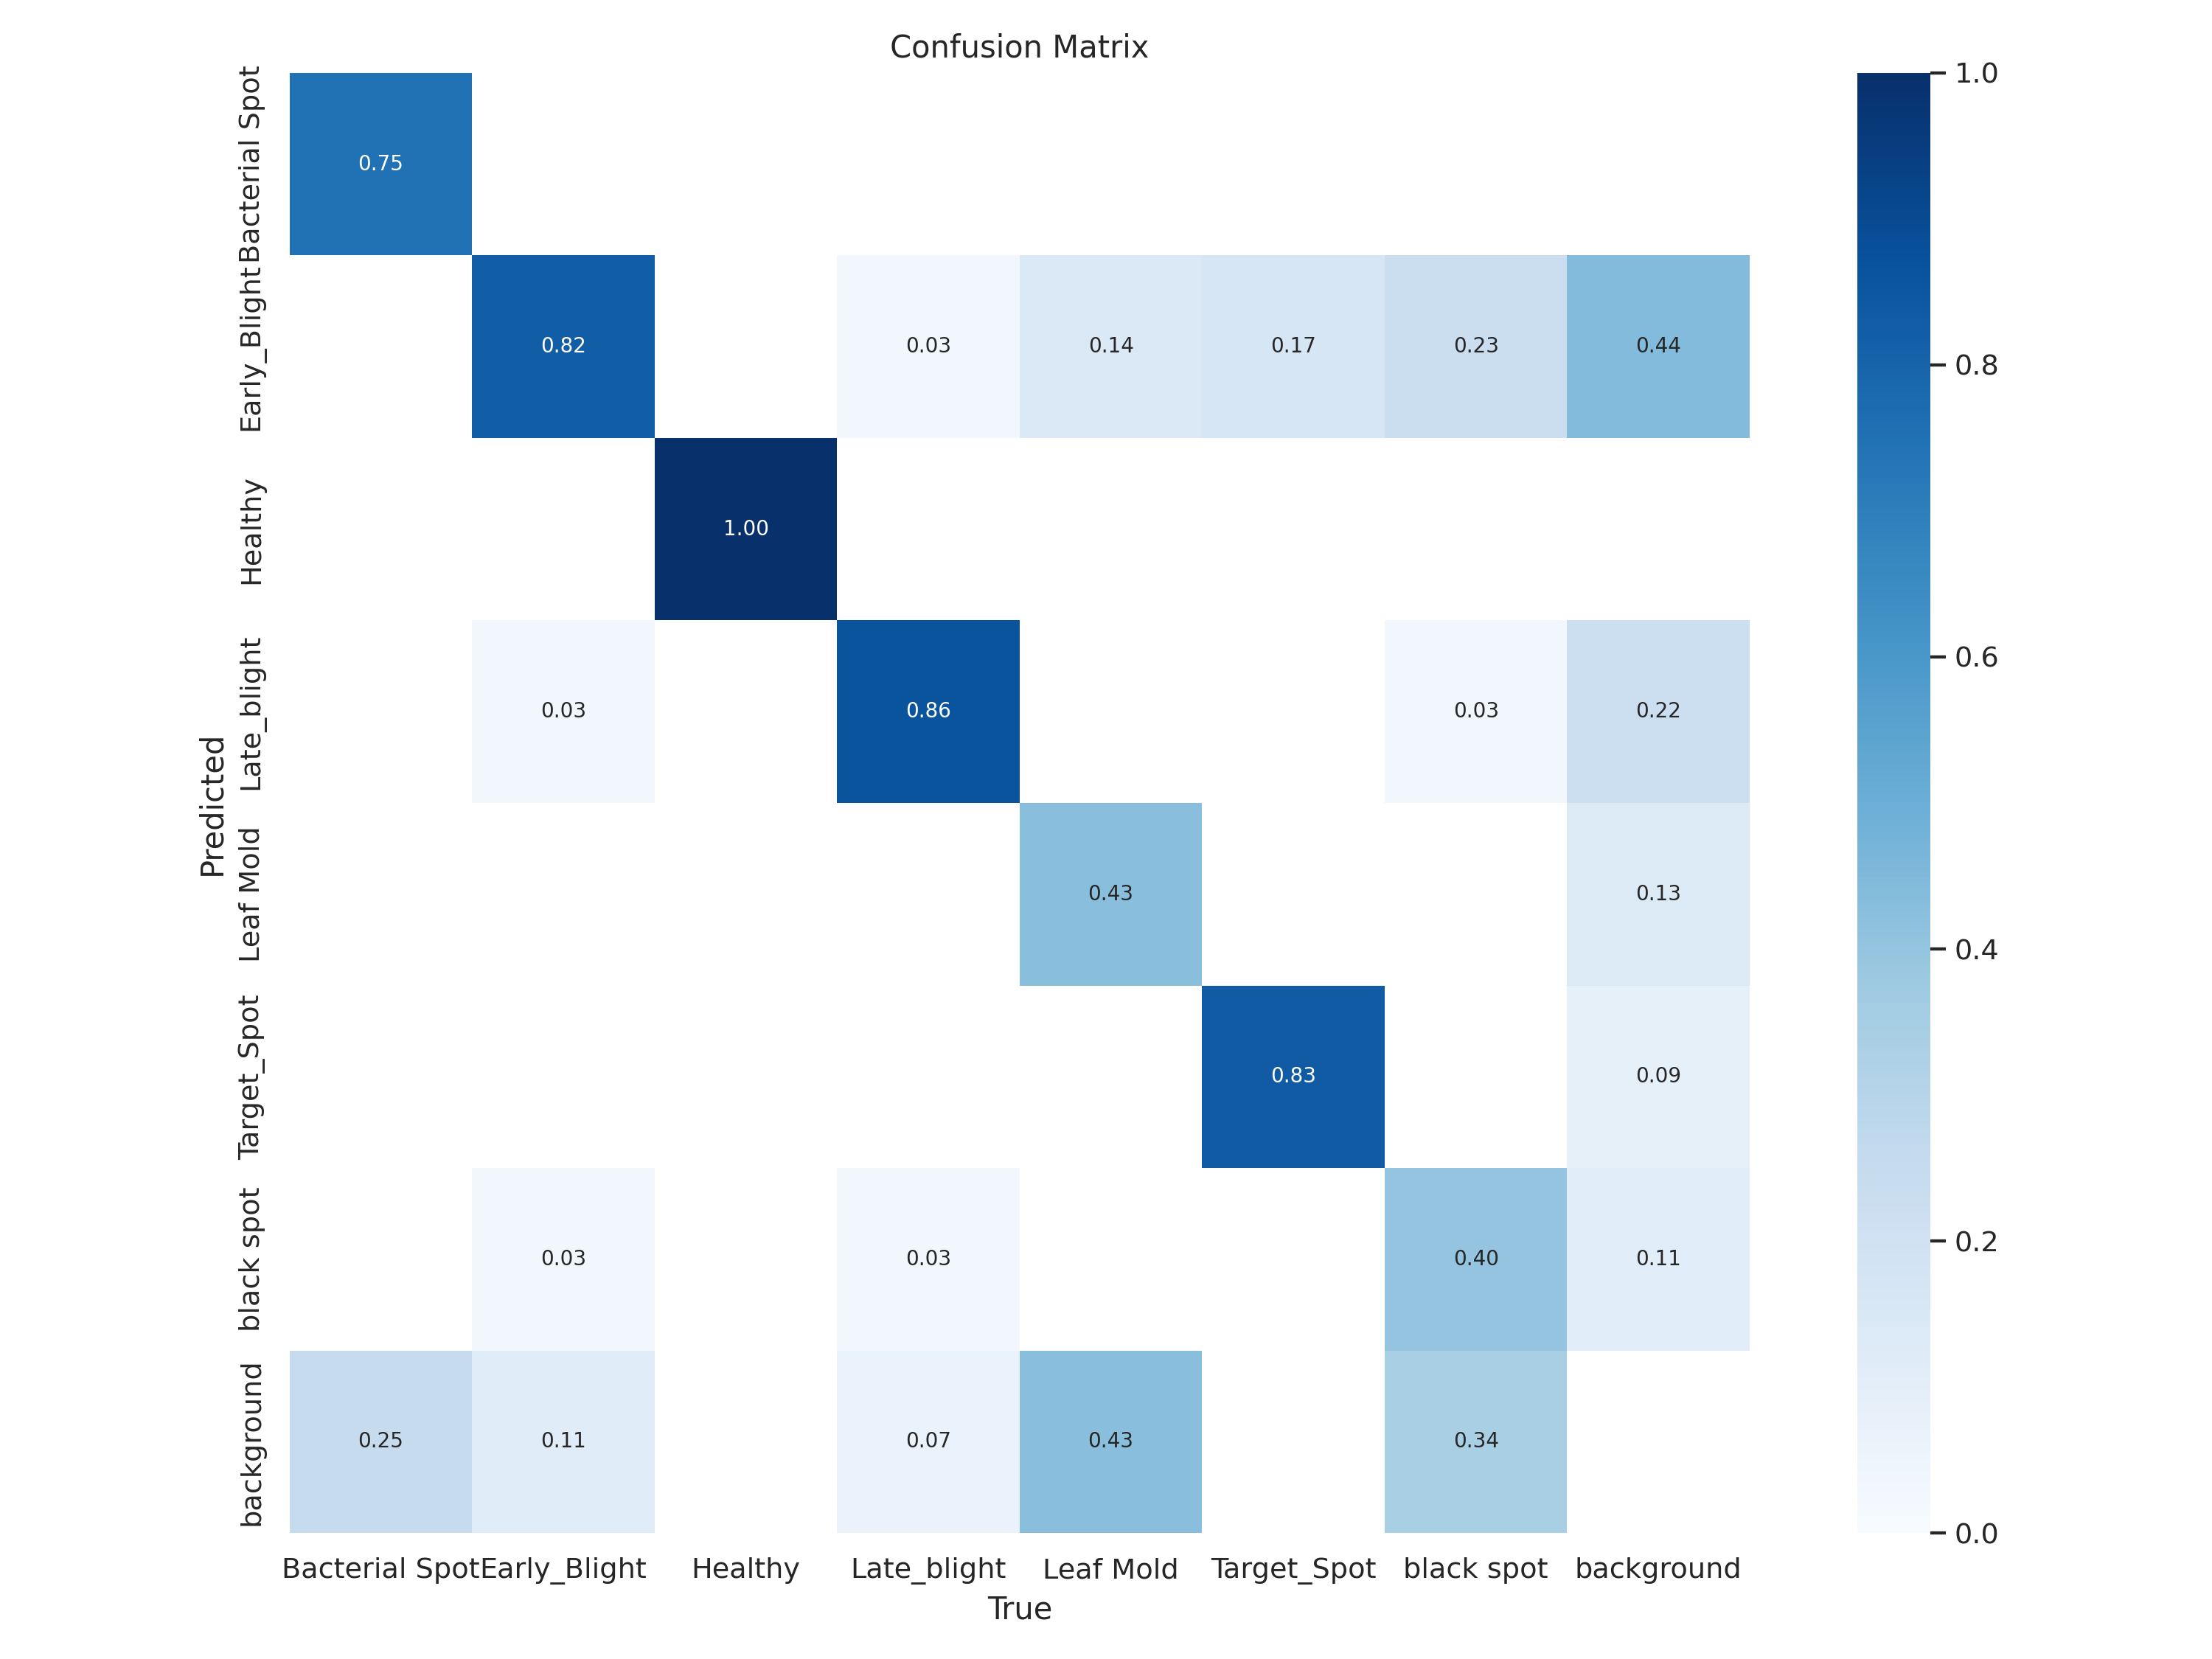

In [ ]:
Image(filename='/content/drive/MyDrive/projectai/project_data/runs/detect/train/confusion_matrix.png', width=600)

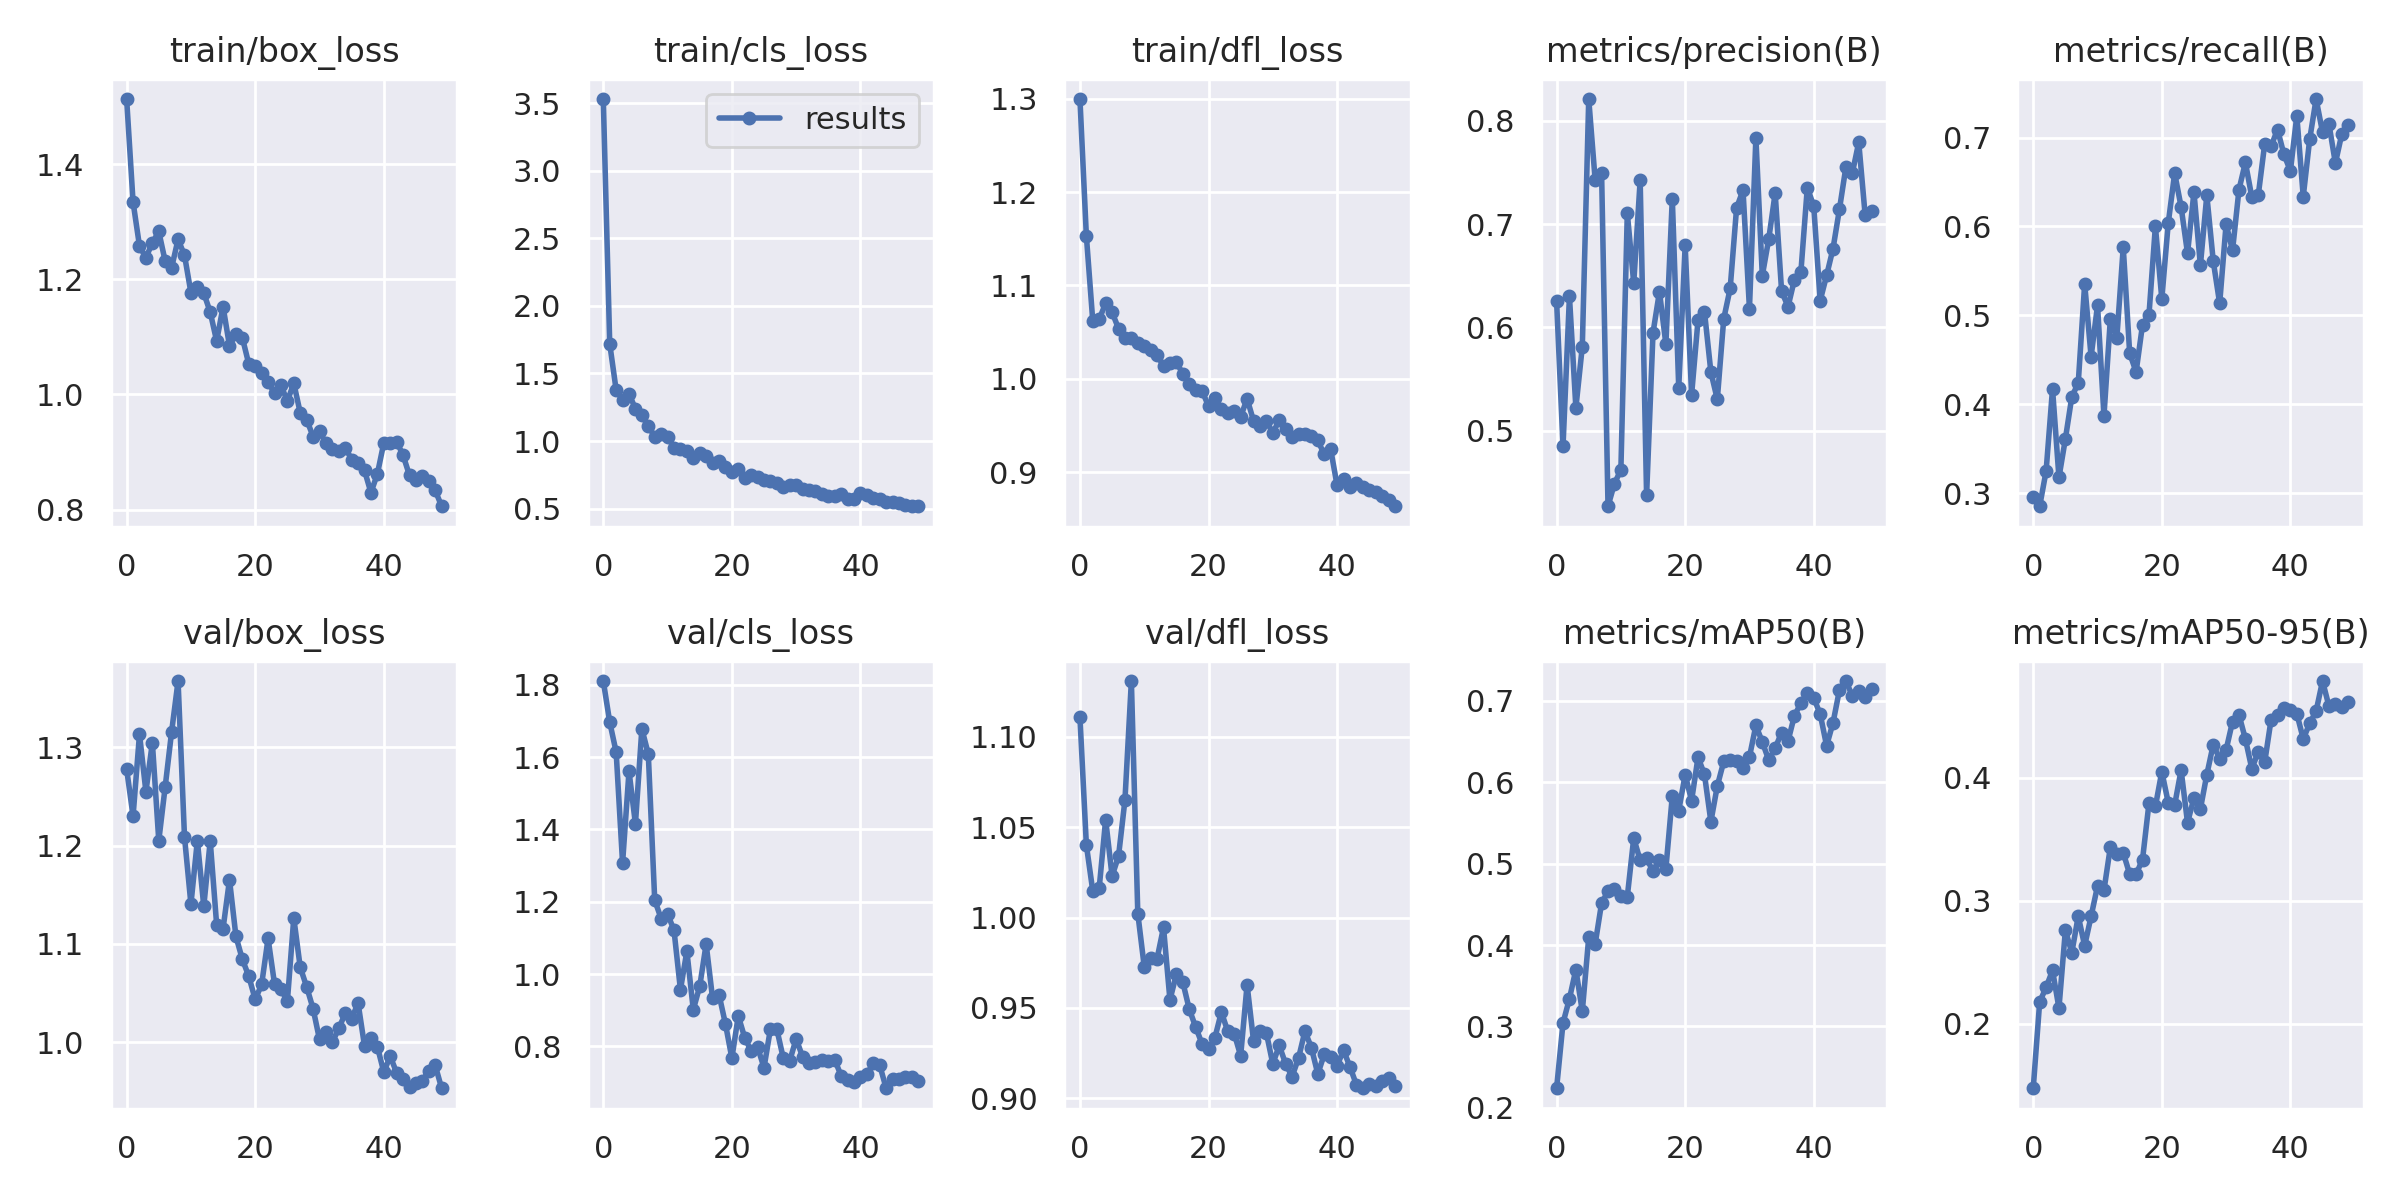

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

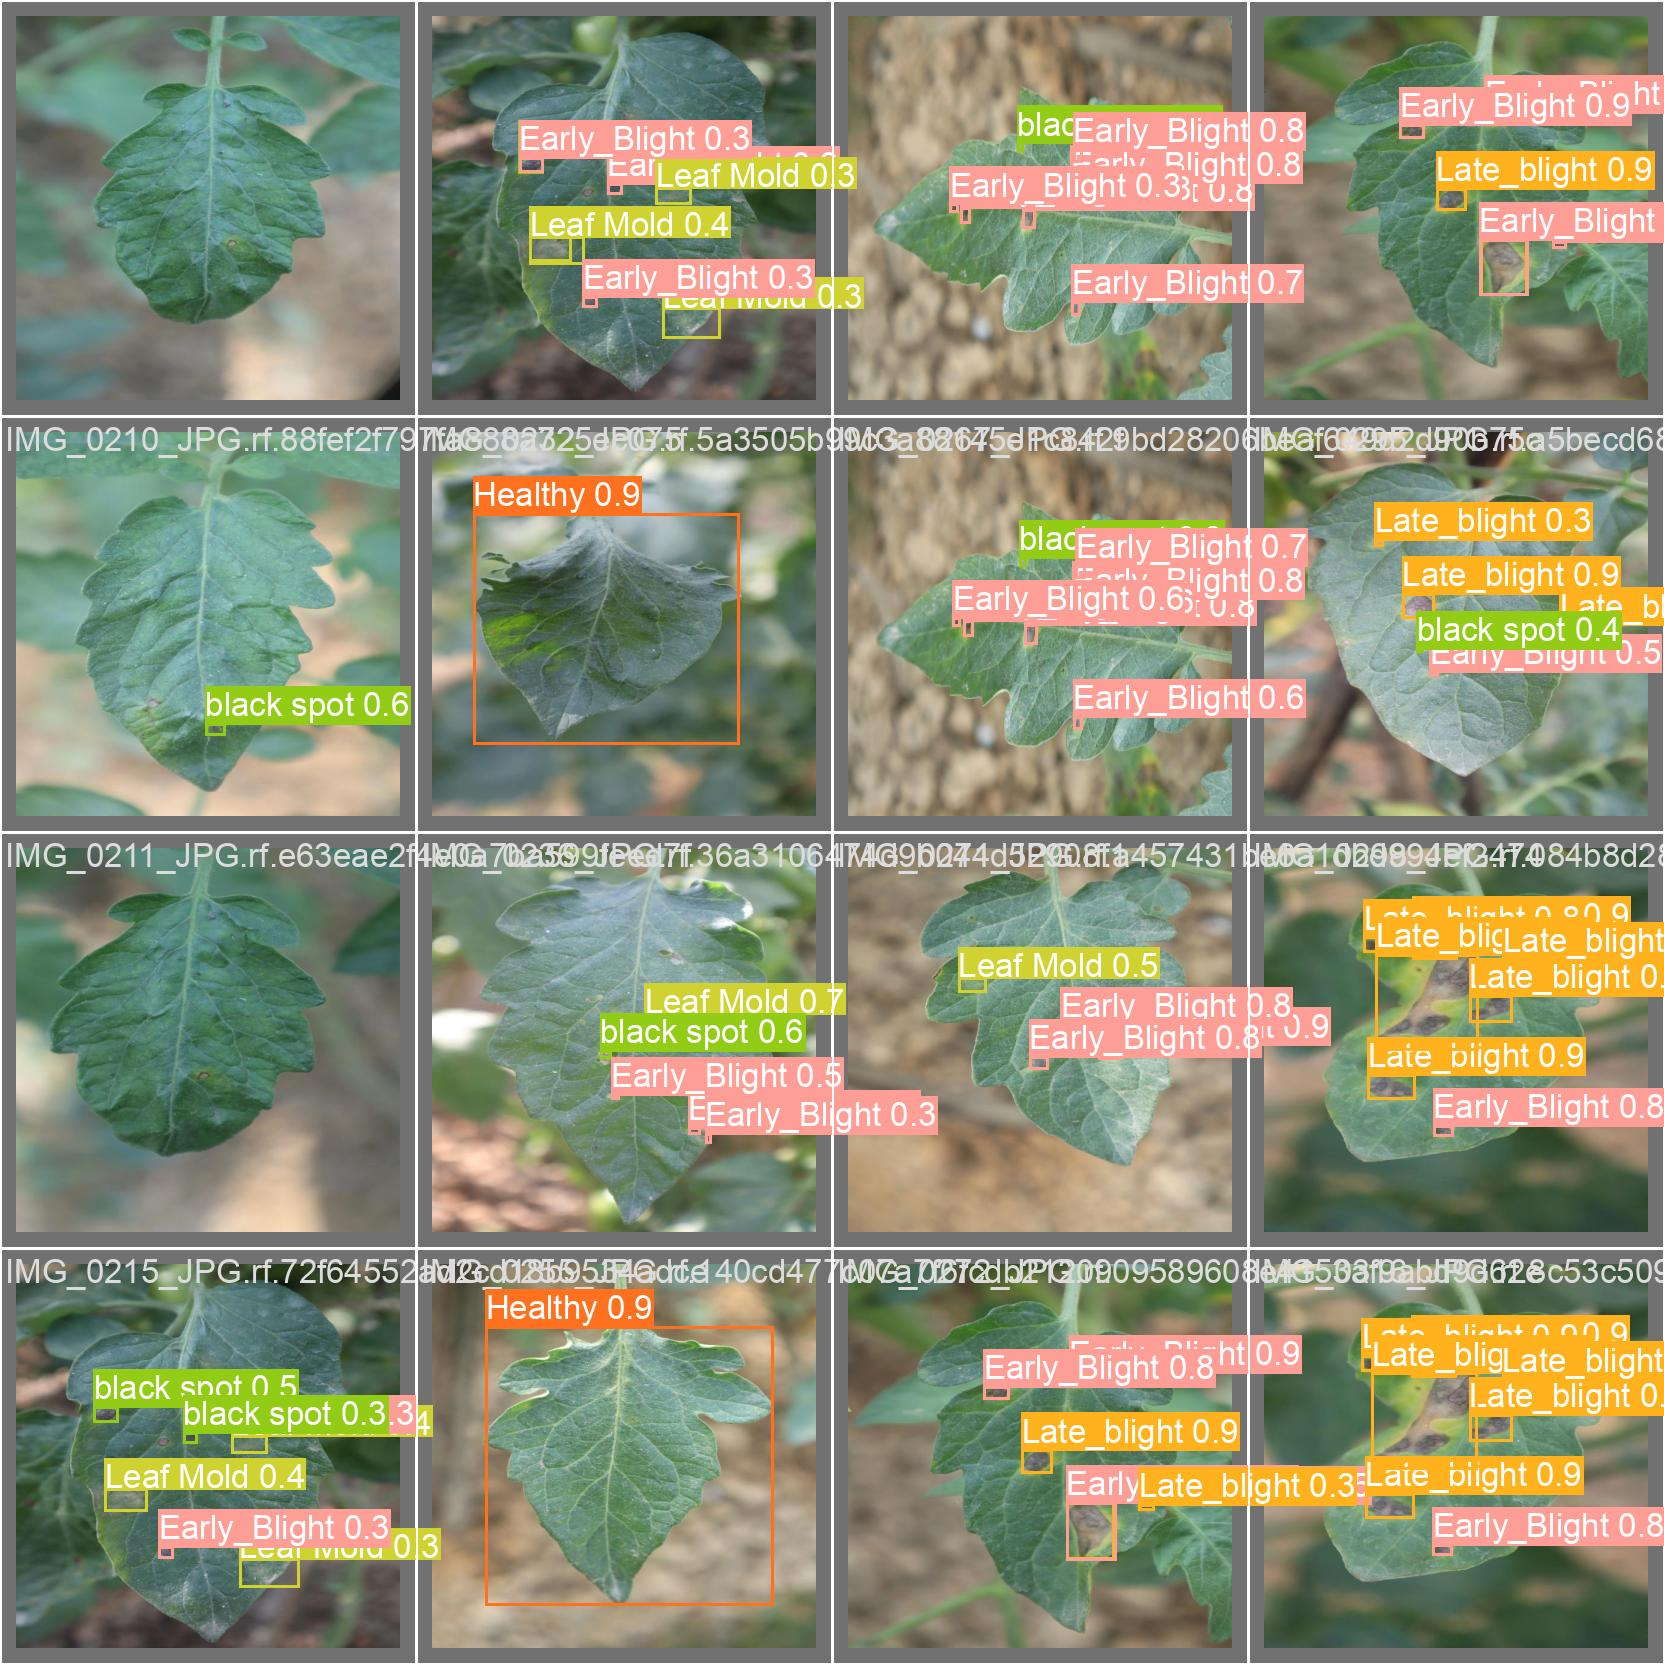

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
import pandas as pd
from tabulate import tabulate


results_csv_path = '/content/drive/MyDrive/projectai/project_data/runs/detect/train4/results.csv'
results_df = pd.read_csv(results_csv_path)

accuracy_values = results_df['       metrics/mAP50(B)']
precision_values = results_df['   metrics/precision(B)']
recall_values = results_df['      metrics/recall(B)']

f1_scores = 2 * (precision_values * recall_values) / (precision_values + recall_values)

average_accuracy = accuracy_values.mean()
average_precision = precision_values.mean()
average_recall = recall_values.mean()
average_f1_score = f1_scores.mean()

metrics = {
    'Model': ['YOLOv8'],
    'Accuracy': [f"{average_accuracy:.2%}"],
    'Precision': [f"{average_precision:.2%}"],
    'Recall': [f"{average_recall:.2%}"],
    'F1 score': [f"{average_f1_score:.2%}"]
}

average_metrics_df = pd.DataFrame(metrics)

print(tabulate(average_metrics_df, headers='keys', tablefmt='grid'))

+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  | 64.28%     | 68.81%      | 65.03%   | 66.27%     |
+----+---------+------------+-------------+----------+------------+


In [ ]:
import numpy as np

csv_file_path = '/content/drive/MyDrive/projectai/project_data/runs/detect/train4/results.csv'
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)
print(data)

[[          0      1.5306      3.8994      1.3258     0.68456     0.31213     0.28237     0.19372      1.3006      1.9538      1.1045    0.070732    0.003252    0.003252]
 [          1      1.3418      1.8255      1.1715     0.43612      0.3445     0.28092     0.20083      1.2487      1.5941      1.0254    0.040639   0.0064922   0.0064922]
 [          2      1.2613      1.4535      1.0918     0.55083     0.24809     0.18481      0.1011      1.6077      2.4712      1.3217    0.010451   0.0096381   0.0096381]
 [          3      1.2761      1.4238      1.1167     0.45714     0.34686     0.32159     0.21335      1.4292      1.6811      1.1918   0.0095757   0.0095757   0.0095757]
 [          4      1.2766      1.3367      1.1231     0.41935     0.35782     0.29723      0.1986      1.3322      1.7378      1.0953   0.0095757   0.0095757   0.0095757]
 [          5      1.2563       1.223      1.0933     0.78313     0.38318     0.41922     0.27982      1.2985      1.3881      1.0869   0.0094343

<ipython-input-8-433ac6c7f60c>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


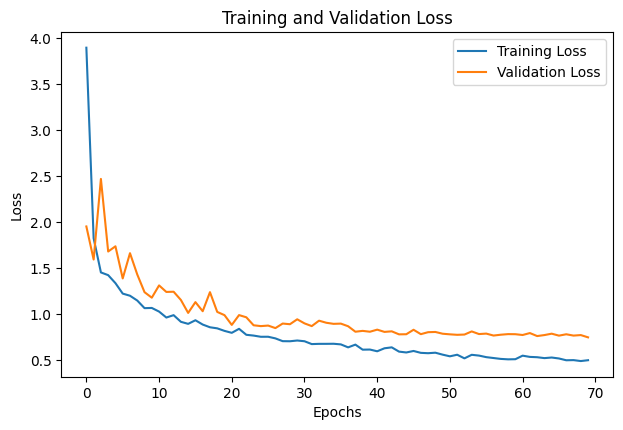

In [ ]:


import os
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data[:, 0], data[:, 1], label='Train Box Loss')
plt.plot(data[:, 0], data[:, 8], label='Val Box Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Box Loss')

plt.subplot(2, 2, 2)
plt.plot(data[:, 0], data[:, 2], label='Training Loss')
plt.plot(data[:, 0], data[:, 9], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')


plt.tight_layout()
plt.show()
